In [227]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math, decimal
import requests
dec = decimal.Decimal
import hvplot.pandas
import krakenex
from pykrakenapi import KrakenAPI
api = krakenex.API()
k = KrakenAPI(api)
import json
FearGreedUrl = requests.get('https://api.alternative.me/fng/?limit=2').json()

In [228]:
from pathlib import Path
csvpath1 = Path("./full_moon.csv")

In [229]:
full_moon = pd.read_csv(csvpath1, parse_dates=True, index_col=' Date', infer_datetime_format=True)
full_moon.reset_index(inplace=True)
full_moon = full_moon.rename(columns = {' Date':'Full Moon'})
full_moon.drop(['Day',' Time'], axis=1, inplace=True)

In [230]:
full_moon['New Moon'] = full_moon['Full Moon'] + timedelta(days=14)
full_moon

,Full Moon,New Moon
0,1900-01-15,1900-01-29
1,1900-02-14,1900-02-28
2,1900-03-16,1900-03-30
3,1900-04-15,1900-04-29
4,1900-05-14,1900-05-28
...,...,...
1863,2050-09-01,2050-09-15
1864,2050-09-30,2050-10-14
1865,2050-10-30,2050-11-13
1866,2050-11-28,2050-12-12


In [231]:
ohlc = k.get_ohlc_data('BTCUSD', interval=1440, ascending = True)
Price = ohlc[0]['Price'] = ohlc[0]['close'].rolling(1).mean()
ohlc[0].drop(['high', 'low', 'time', 'open', 'close', 'vwap', 'count', 'volume'], axis = 1).tail()

,Price
dtime,
2022-04-22,39715.9
2022-04-23,39435.6
2022-04-24,39467.9
2022-04-25,40438.5
2022-04-26,39443.7


In [232]:
# Create a Moon Data table with the BTC Price data for each Full and New Moon date

full_moon = full_moon.join(ohlc[0]['Price'], on = 'Full Moon', how = 'inner')
full_moon['Full Moon Price'] = full_moon['Price']
full_moon = full_moon.drop(columns=['Price']).reset_index()

full_moon = full_moon.join(ohlc[0]['Price'], on = 'New Moon', how = 'inner')
full_moon['New Moon Price'] = full_moon['Price']
full_moon = full_moon.drop(columns=['Price']).reset_index()
moon_data = full_moon.drop(columns=['index','level_0'])
moon_data
#moon_data.drop(['level_0'], axis=1, inplace=True)
# moon_data = moon_data.groupby(['Full Moon']).mean()


,Full Moon,New Moon,Full Moon Price,New Moon Price
0,2020-05-07,2020-05-21,10001.0,9057.3
1,2020-06-05,2020-06-19,9617.7,9302.1
2,2020-07-05,2020-07-19,9083.8,9213.7
3,2020-08-03,2020-08-17,11237.3,12301.7
4,2020-09-02,2020-09-16,11396.9,10951.1
5,2020-10-01,2020-10-15,10616.1,11501.0
6,2020-10-31,2020-11-14,13809.1,16080.1
7,2020-11-30,2020-12-14,19708.1,19281.1
8,2020-12-30,2021-01-13,28879.9,37390.1
9,2021-01-28,2021-02-11,33430.4,47962.8


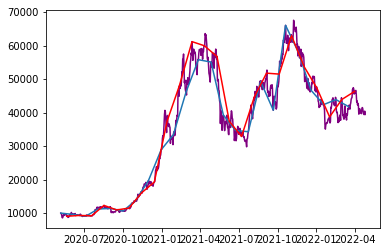

In [233]:
# Show the BTC Price over time

x = pd.DataFrame(ohlc[0]['Price']).index.to_numpy()
y = pd.DataFrame(ohlc[0]['Price']).to_numpy()
plt.plot(x,y, color='purple')

x = pd.DataFrame(moon_data['Full Moon']).to_numpy()
y = pd.DataFrame(moon_data['Full Moon Price']).to_numpy()
plt.plot(x,y)

x = pd.DataFrame(moon_data['New Moon']).to_numpy()
y = pd.DataFrame(moon_data['New Moon Price']).to_numpy()
plt.plot(x,y, color='red')

plt.show()


In [234]:
# create hvplot figures to then overaly 
glyph_1 = ohlc[0]['Price'].hvplot.line( 
    'dtime', 'Price',
    color='purple',
    xlabel='Date',
    ylabel='BTC Price',
    title='BTC Price over Time'
)

glyph_2 = moon_data.hvplot.scatter(
    x = 'Full Moon',
    y = 'Full Moon Price',
    xlabel='Date',
    ylabel='BTC Price',
    title='BTC Price over Time'
)

glyph_3 = moon_data.hvplot.scatter(
    x = 'New Moon',
    y = 'New Moon Price',
    xlabel='Date',
    ylabel='BTC Price',
    title='BTC Price over Time'
)


In [235]:
#overaly the figures created above 
glyph_1*glyph_2*glyph_3

:Overlay
   .Curve.Price :Curve   [dtime]   (Price)
   .Scatter.I   :Scatter   [Full Moon]   (Full Moon Price)
   .Scatter.II  :Scatter   [New Moon]   (New Moon Price)

In [236]:
FearGreedUrl

{'name': 'Fear and Greed Index',
 'data': [{'value': '27',
   'value_classification': 'Fear',
   'timestamp': '1650931200',
   'time_until_update': '33459'},
  {'value': '23',
   'value_classification': 'Extreme Fear',
   'timestamp': '1650844800'}],
 'metadata': {'error': None}}

In [237]:
Fear_Index = FearGreedUrl.hvplot.bar(
    x = 'timestamp',
    y = 'data',
    xlabel = 'Date',
    ylabel = 'Fear Index',
    title = 'BTC Fear/Greed Index'
)
Fear_Index

AttributeError: 'dict' object has no attribute 'hvplot'